In [1]:
import mplfinance as mpf
import requests
import pandas as pd
import re
import time


import plotly.graph_objects as go
import plotly.subplots as ms
import talib
import matplotlib.pyplot as plt     # 점찍기용


import matplotlib.pyplot as plt    # 히트맵용
import seaborn as sns              # 히트맵용
import numpy as np
from pandas import Series, DataFrame

In [2]:
test1 = pd.read_csv('003380.KQ.csv', encoding='cp949')
test1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16700.0,16950.0,16550.0,16800.0,16545.455078,218658.0
1,2018-01-03,16700.0,16800.0,16500.0,16750.0,16496.212891,210082.0
2,2018-01-04,16650.0,16700.0,16350.0,16350.0,16102.273438,269871.0
3,2018-01-05,16350.0,16650.0,16350.0,16650.0,16397.726563,150041.0
4,2018-01-08,16650.0,16800.0,16400.0,16600.0,16348.485352,239485.0
...,...,...,...,...,...,...,...
1307,2023-04-24,15900.0,15980.0,11420.0,11420.0,11420.000000,15336260.0
1308,2023-04-25,9600.0,10060.0,9210.0,9920.0,9920.000000,41788180.0
1309,2023-04-26,9700.0,9950.0,9420.0,9420.0,9420.000000,11029340.0
1310,2023-04-27,9350.0,9490.0,8930.0,9100.0,9100.000000,7164479.0


In [3]:
# date, close, volume만 남기기

test1 = test1[['Date', 'Close', 'Volume']]
test1

,Date,Close,Volume
0,2018-01-02,16800.0,218658.0
1,2018-01-03,16750.0,210082.0
2,2018-01-04,16350.0,269871.0
3,2018-01-05,16650.0,150041.0
4,2018-01-08,16600.0,239485.0
...,...,...,...
1307,2023-04-24,11420.0,15336260.0
1308,2023-04-25,9920.0,41788180.0
1309,2023-04-26,9420.0,11029340.0
1310,2023-04-27,9100.0,7164479.0


In [4]:
test2 = pd.read_csv('게시글_003380.csv', encoding='cp949')
test2

,날짜,게시글
0,2017-06-30,254
1,2017-07-01,31
2,2017-07-02,14
3,2017-07-03,77
4,2017-07-04,85
...,...,...
1795,2023-04-27,481
1796,2023-04-28,641
1797,2023-04-29,88
1798,2023-04-30,52


In [5]:
test1.index = pd.DatetimeIndex(test1['Date'])
test1

,Date,Close,Volume
Date,,,
2018-01-02,2018-01-02,16800.0,218658.0
2018-01-03,2018-01-03,16750.0,210082.0
2018-01-04,2018-01-04,16350.0,269871.0
2018-01-05,2018-01-05,16650.0,150041.0
2018-01-08,2018-01-08,16600.0,239485.0
...,...,...,...
2023-04-24,2023-04-24,11420.0,15336260.0
2023-04-25,2023-04-25,9920.0,41788180.0
2023-04-26,2023-04-26,9420.0,11029340.0


In [6]:
test2.index = pd.DatetimeIndex(test2['날짜'])
test2

,날짜,게시글
날짜,,
2017-06-30,2017-06-30,254
2017-07-01,2017-07-01,31
2017-07-02,2017-07-02,14
2017-07-03,2017-07-03,77
2017-07-04,2017-07-04,85
...,...,...
2023-04-27,2023-04-27,481
2023-04-28,2023-04-28,641
2023-04-29,2023-04-29,88


In [7]:
# https://ddaaadd.tistory.com/154

m = test1.join(test2)

m

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,16800.0,218658.0,2018-01-02,6.0
2018-01-03,2018-01-03,16750.0,210082.0,2018-01-03,2.0
2018-01-04,2018-01-04,16350.0,269871.0,2018-01-04,7.0
2018-01-05,2018-01-05,16650.0,150041.0,NaN,NaN
2018-01-08,2018-01-08,16600.0,239485.0,2018-01-08,2.0
...,...,...,...,...,...
2023-04-24,2023-04-24,11420.0,15336260.0,2023-04-24,1355.0
2023-04-25,2023-04-25,9920.0,41788180.0,2023-04-25,1713.0
2023-04-26,2023-04-26,9420.0,11029340.0,2023-04-26,731.0


In [8]:
m.head(20)

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,16800.0,218658.0,2018-01-02,6.0
2018-01-03,2018-01-03,16750.0,210082.0,2018-01-03,2.0
2018-01-04,2018-01-04,16350.0,269871.0,2018-01-04,7.0
2018-01-05,2018-01-05,16650.0,150041.0,NaN,NaN
2018-01-08,2018-01-08,16600.0,239485.0,2018-01-08,2.0
2018-01-09,2018-01-09,16200.0,293553.0,2018-01-09,4.0
2018-01-10,2018-01-10,16500.0,179833.0,2018-01-10,1.0
2018-01-11,2018-01-11,16950.0,217862.0,2018-01-11,4.0
2018-01-12,2018-01-12,17250.0,370280.0,2018-01-12,2.0


In [9]:
m = m.rename(columns={'날짜': 'naver_date', '게시글': 'Post'})

In [10]:
heatmap_data = m[["Close", "Volume", "Post"]]

<Axes: title={'center': '003380.KQ'}>

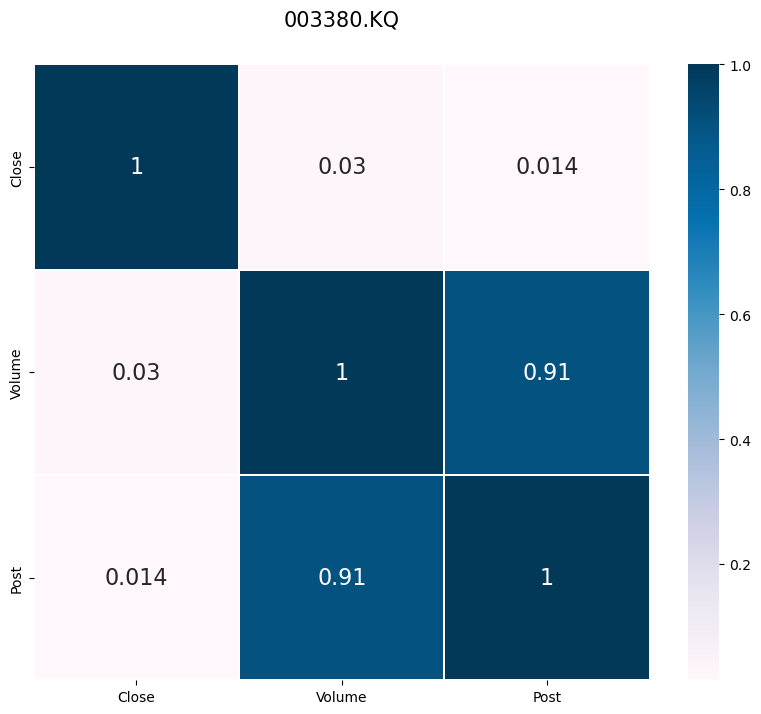

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("003380.KQ", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})